<a href="https://colab.research.google.com/github/KerkPirr14/poisonous-mushrooms/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импортируем библиотеки, зашружаем датасет с гугл.диска
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import statsmodels.api as sm
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/REU/mushrooms.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
# проверяем структуру и типы данных ДФ
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# проверяем ДФ на прошущенные данные
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
# проверяем ДФ на дубликаты строк
df.duplicated().sum()

0

In [ ]:
# удаляем неприменимый технически параметр
df = df.drop(['odor'], axis = 1)

In [ ]:
# находим столбцы с одинаковыми значениями
list_to_del = []
for col in df.columns:
  if len(df[col].unique()) == 1:
    list_to_del.append(col)
list_to_del

['veil-type']

In [ ]:
# удаляем столбцы с одинаковыми значениями
df = df.drop(list_to_del, axis = 1)
df

,class,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,a,c,b,y,e,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,a,c,b,y,e,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,a,c,b,n,e,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,f,c,n,b,t,...,s,k,w,w,w,o,e,w,v,l


In [ ]:
# переводим категориальные переменные в числовые
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])
df


,class,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


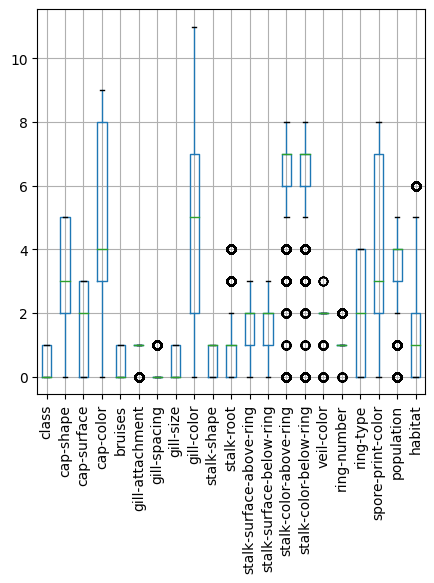

In [ ]:
# Проверяем на выбросы
df.boxplot(figsize = (5, 5))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# строим корреляционную матрицу
df.corr().style.background_gradient(cmap="coolwarm")

,class,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972
stalk-shape,-0.102019,0.063794,-0.014123,-0.456496,0.099364,0.186485,0.080895,0.214576,-0.175699,1.000000,-0.163422,0.015193,-0.034399,0.223439,0.235794,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216


In [ ]:
# ищем столбцы с высокой корреляцией
factors = []
cor_max = 0.6
target = 'class'
df = df[[target] + [x for x in df.columns if x != target]]
cor_matrix=df.corr()
for i in range(1, len(cor_matrix)-1):
  for j in range(i+1,len(cor_matrix)):
    if np.abs(cor_matrix.iloc[i, j]) >= cor_max:
      if abs(cor_matrix.iloc[0, j]) > abs(cor_matrix.iloc[0, i]):
        factors.append(i)
      else:
        factors.append(j)
cor_matrix.columns[list(set(factors))]

Index(['ring-type', 'spore-print-color', 'gill-attachment'], dtype='object')

In [ ]:
# удаляем найденные столбцы с высокой корреляцией
names_to_del = cor_matrix.columns[list(set(factors))]
df = df.drop(names_to_del, axis = 1)
df

,class,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,population,habitat
0,1,5,2,4,1,0,1,4,0,3,2,2,7,7,2,1,3,5
1,0,5,2,9,1,0,0,4,0,2,2,2,7,7,2,1,2,1
2,0,0,2,8,1,0,0,5,0,2,2,2,7,7,2,1,2,3
3,1,5,3,8,1,0,1,5,0,3,2,2,7,7,2,1,3,5
4,0,5,2,3,0,1,0,4,1,3,2,2,7,7,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,0,0,11,0,0,2,2,5,5,1,1,1,2
8120,0,5,2,4,0,0,0,11,0,0,2,2,5,5,0,1,4,2
8121,0,2,2,4,0,0,0,5,0,0,2,2,5,5,1,1,1,2
8122,1,3,3,4,0,0,1,0,1,0,2,1,7,7,2,1,4,2


In [ ]:
# проверяем ДФ на дубликаты строк
df.duplicated().sum()

3434

In [ ]:
# удаляем появившиеся дубликаты
df = df.drop_duplicates()
df
# Получаем ДФ после препроцессинга

,class,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,population,habitat
0,1,5,2,4,1,0,1,4,0,3,2,2,7,7,2,1,3,5
1,0,5,2,9,1,0,0,4,0,2,2,2,7,7,2,1,2,1
2,0,0,2,8,1,0,0,5,0,2,2,2,7,7,2,1,2,3
3,1,5,3,8,1,0,1,5,0,3,2,2,7,7,2,1,3,5
4,0,5,2,3,0,1,0,4,1,3,2,2,7,7,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,0,0,2,3,0,1,0,2,0,0,1,2,7,7,2,2,2,1
8096,0,3,0,8,0,1,0,10,0,0,1,2,7,7,2,2,2,1
8099,0,3,0,8,0,1,0,10,0,0,1,1,7,7,2,2,3,1
8109,0,0,2,8,0,1,0,10,0,0,2,2,7,7,2,2,2,1


In [ ]:
# Разбиваем ДФ после препроцессинга на тренинговую и тестовую выборки (80% к 20%)
from sklearn.model_selection import train_test_split # импортируем функцию для случайного разбиения на тестовую и тренировочную выбори
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('class', axis = 1), df['class'], test_size = 0.2) # разделяем датасет на тестовую и тренировочную выборки

X_train

,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,population,habitat
4934,2,2,3,1,0,0,3,1,1,0,0,7,7,2,1,4,1
5469,5,3,4,0,0,1,0,1,0,1,1,7,6,2,1,4,0
4429,5,3,4,0,0,1,0,1,0,1,2,7,6,2,1,4,0
5197,3,3,5,1,0,0,1,0,0,2,2,7,2,2,2,1,6
2135,5,3,3,1,0,0,9,1,1,2,2,6,7,2,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7604,3,0,3,0,1,0,7,0,0,1,1,7,7,2,2,3,1
72,2,0,9,1,1,1,10,1,1,2,2,7,7,2,1,4,0
2529,2,0,4,1,0,0,7,1,1,2,2,6,7,2,1,5,0
3159,5,0,3,0,0,0,2,0,1,1,1,6,0,2,1,5,0


Логистическая регрессия

In [ ]:
X_train_lg, X_test_lg, Y_train_lg, Y_test_lg = X_train, X_test, Y_train, Y_test
model = sm.Logit(Y_train_lg, sm.add_constant(X_train_lg)).fit(method='bfgs') # обучаем модель логистической регрессии с применением метода оптимизации
print(model.summary())
p_max = 0.05
while np.max(model.pvalues[1:]) > p_max:
  col = X_train_lg.columns[np.argmax(model.pvalues[1:])]
  X_train_lg = X_train_lg.drop(col, axis = 1)
  X_test_lg = X_test_lg.drop(col, axis = 1)
  model = sm.Logit(Y_train_lg, sm.add_constant(X_train_lg)).fit(method='bfgs')
print(model.summary())

         Current function value: 0.255365
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 3752
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           17
Date:                Fri, 28 Apr 2023   Pseudo R-squ.:                  0.6301
Time:                        10:42:36   Log-Likelihood:                -958.13
converged:                      False   LL-Null:                       -2589.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.7816      1.293  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.255100
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.255222
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                 3752
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           15
Date:                Fri, 28 Apr 2023   Pseudo R-squ.:                  0.6303
Time:                        10:42:36   Log-Likelihood:                -957.59
converged:                      False   LL-Null:                       -2589.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.9837      1.386      0.710      0.478      -1.732       3.700
cap-shape                   -0.0869      0.037     -2.349      0.019      -0.159      -0.

MSE Тривиальной модели: 0.24860799187128632
MSE Логистической регрессии: 0.5144572527719392


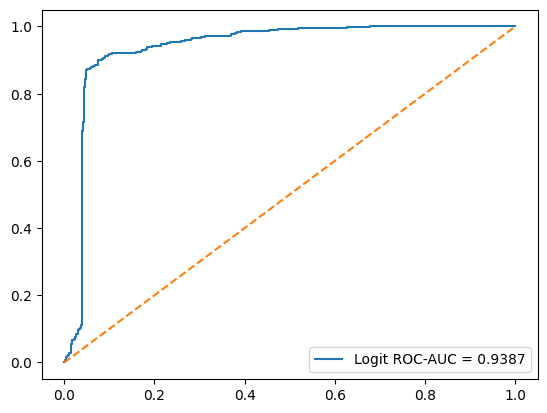

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score # импортируем функции для рассчета РОК-кривой и площадью под ней
logit_pred = model.predict(sm.add_constant(X_test_lg))
fpr, tpr, thresholds = roc_curve(Y_test_lg, logit_pred) # получаем данные для визуализации РОК-кривой
logit_auc = roc_auc_score(Y_test_lg, logit_pred) # вычисляем площадь под РОК-кривой
plt.plot(fpr, tpr, label = 'Logit ROC-AUC = %.4f' %logit_auc) # выводим РОК-кривую на график
plt.plot([0, 1], [0, 1], linestyle = '--') # добавляем опорную диагональ
plt.legend()
print('MSE Тривиальной модели:', np.mean((Y_test - Y_train.mean()) ** 2))
print('MSE Логистической регрессии:', np.mean((Y_test - logit_pred.reset_index(drop = True)) ** 2))

Деревья решений

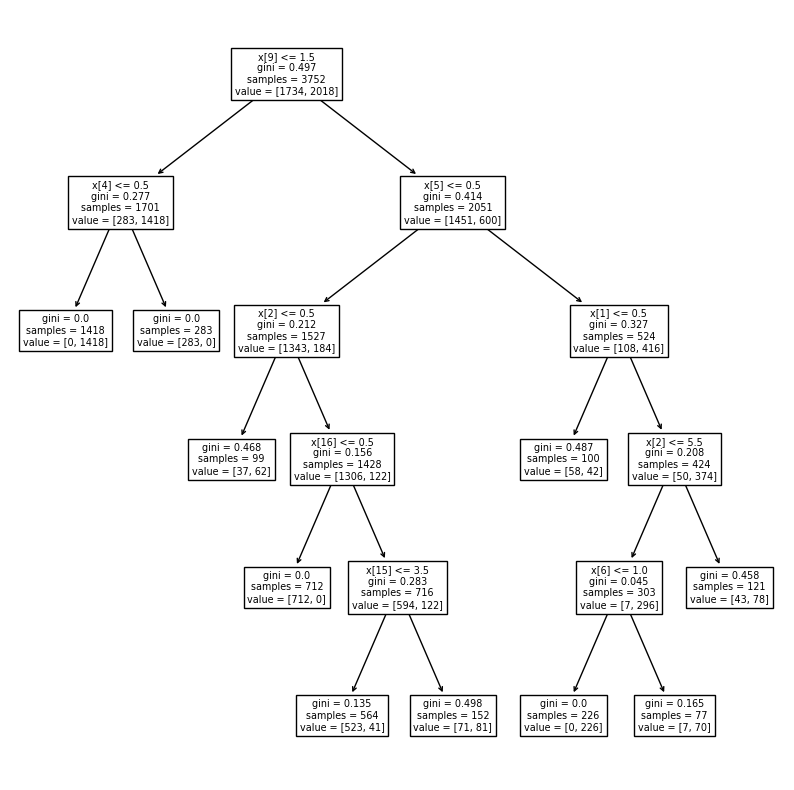

In [ ]:
from sklearn import tree # импортируем функцию для построения дерева решений
X_train_tr, X_test_tr, Y_train_tr, Y_test_tr = X_train, X_test, Y_train, Y_test
decision_tree = tree.DecisionTreeClassifier(max_depth = 5, min_weight_fraction_leaf=0.02, min_impurity_decrease=0.0001).fit(X_train_tr, Y_train_tr) # строим модель дерева решений
tree_pred = decision_tree.predict_proba(X_test_tr)[:, 1] # получаем прогноз по построенной модели с вероятностями класса 1
plt.figure(figsize = (10, 10))
tree.plot_tree(decision_tree) # выводим получившееся дерево
plt.show()


MSE Тривиальной модели: 0.24860799187128632
MSE Решающего дерева: 0.04126456166363162


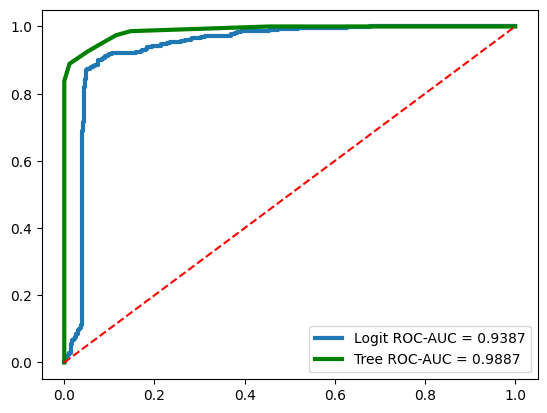

In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(Y_test_tr, tree_pred)
tree_auc = roc_auc_score(Y_test_tr, tree_pred)
plt.plot(fpr, tpr, label = 'Logit ROC-AUC = %.4f' %logit_auc, linewidth=3)
plt.plot(fpr1, tpr1, label = 'Tree ROC-AUC = %.4f' %tree_auc, color = 'green', linewidth=3)
plt.legend()
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--')
print('MSE Тривиальной модели:', np.mean((Y_test - Y_train.mean()) ** 2))
print('MSE Решающего дерева:', np.mean((Y_test - tree_pred) ** 2))

Случайный лес

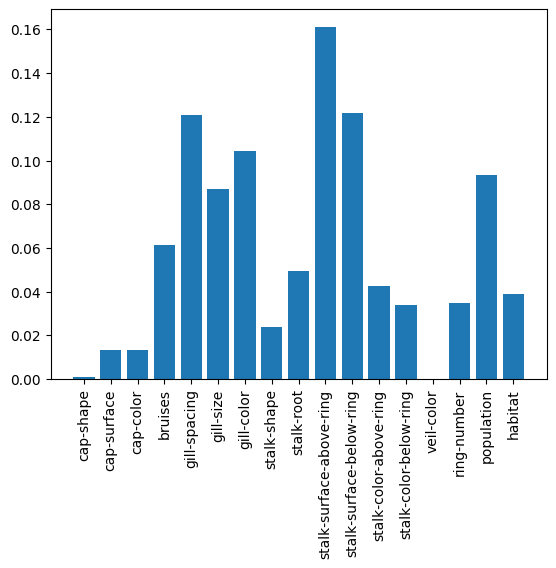

In [ ]:
from sklearn import ensemble
X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = X_train, X_test, Y_train, Y_test

rf = ensemble.RandomForestClassifier(n_estimators = 500, max_depth = 4, min_weight_fraction_leaf = 0.02, min_impurity_decrease = 0.0001).fit(X_train_rf, Y_train_rf)
rf_pred = rf.predict_proba(X_test_rf)[:, 1]
plt.bar(X_train_rf.columns, rf.feature_importances_) # выводим график значимостей факторов модели
plt.xticks(rotation = 90)
plt.show()


In [ ]:
# удаляем малозначимые факторы, переобучаем модель и предсказываем данные
X_train_rf = X_train_rf.drop(['cap-shape', 'veil-color'], axis = 1)
X_test_rf = X_test_rf.drop(['cap-shape', 'veil-color'], axis = 1)
rf = ensemble.RandomForestClassifier(n_estimators = 500, max_depth = 4, min_weight_fraction_leaf = 0.02, min_impurity_decrease = 0.0001).fit(X_train_rf, Y_train_rf)
rf_pred = rf.predict_proba(X_test_rf)[:, 1]

MSE Тривиальной модели: 0.24860799187128632
MSE Случайного леса: 0.04979102364946647


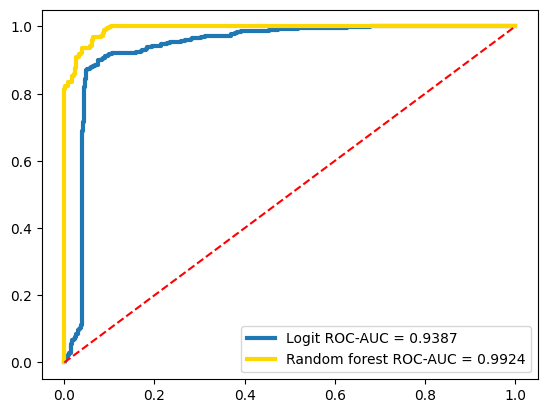

In [ ]:
# Строим РОК-кривую
plt.plot(fpr, tpr, label = 'Logit ROC-AUC = %.4f' %logit_auc, linewidth=3)
fpr2, tpr2, thresholds2 = roc_curve(Y_test_rf, rf_pred)
rf_auc = roc_auc_score(Y_test_rf, rf_pred)
plt.plot(fpr2, tpr2, label = 'Random forest ROC-AUC = %.4f' %rf_auc, color = 'gold', linewidth=3)
plt.legend()
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--')
print('MSE Тривиальной модели:', np.mean((Y_test - Y_train.mean()) ** 2))
print('MSE Случайного леса:', np.mean((Y_test - rf_pred) ** 2))

Градиентный бустинг

MSE Тривиальной модели: 0.24860799187128632
MSE Градиентного бустинга: 0.0015149118553467935


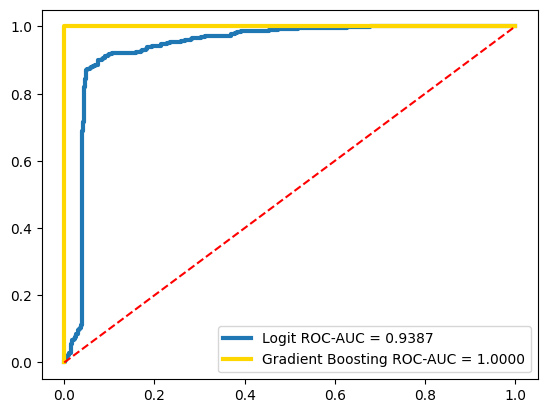

In [ ]:
X_train_gb, X_test_gb, Y_train_gb, Y_test_gb = X_train, X_test, Y_train, Y_test
gb = ensemble.GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.02, min_weight_fraction_leaf = 0.01, max_depth = 4, min_impurity_decrease = 0.0001).fit(X_train_gb, Y_train_gb)
gb_pred = gb.predict_proba(X_test_gb)[:, 1]
plt.plot(fpr, tpr, label = 'Logit ROC-AUC = %.4f' %logit_auc, linewidth=3)
fpr3, tpr3, thresholds3 = roc_curve(Y_test_gb, gb_pred)
gb_auc = roc_auc_score(Y_test_gb, gb_pred)
plt.plot(fpr3, tpr3, label = 'Gradient Boosting ROC-AUC = %.4f' %gb_auc, color = 'gold', linewidth=3)
plt.legend()
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--')
print('MSE Тривиальной модели:', np.mean((Y_test - Y_train.mean()) ** 2))
print('MSE Градиентного бустинга:', np.mean((Y_test - gb_pred) ** 2))

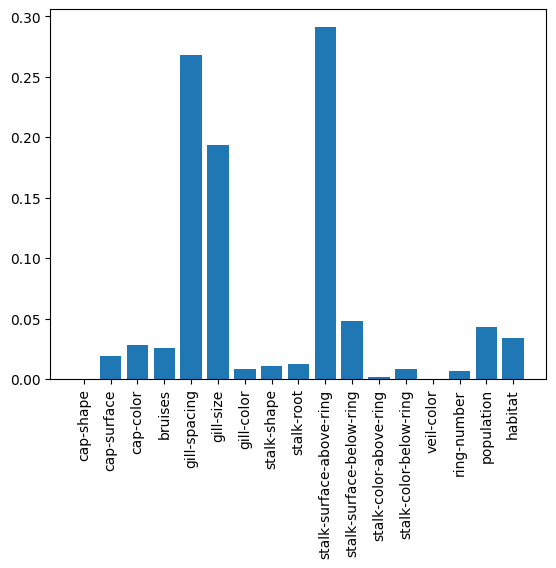

In [ ]:
plt.bar(X_train_gb.columns, gb.feature_importances_) # выводим график значимостей факторов модели
plt.xticks(rotation = 90)
plt.show()

Метод ближайших соседей

MSE Тривиальной модели: 0.24860799187128632
MSE Метода ближайших соседей: 0.1707991855010661


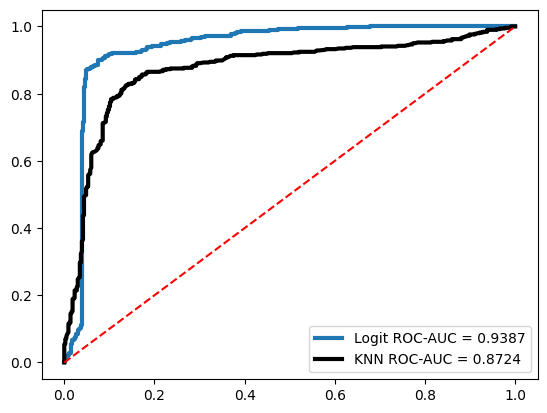

In [ ]:
X_train_knn = (X_train - X_train.mean()) /  X_train.std()
X_test_knn = (X_test - X_train.mean()) /  X_train.std()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1500, p = 2).fit(X_train_knn, Y_train)
pred_knn = knn.predict_proba(X_test_knn)[:, 1]
plt.plot(fpr, tpr, label = 'Logit ROC-AUC = %.4f' %logit_auc, linewidth  =3)
#plt.plot(fpr1, tpr1, label = 'Tree ROC-AUC = %.4f' %tree_auc, color = 'green', linewidth = 3)
#plt.plot(fpr2, tpr2, label = 'Random forest ROC-AUC = %.4f' %rf_auc, color = 'k', linewidth = 3)
#plt.plot(fpr3, tpr3, label = 'GB ROC-AUC = %.4f' %gb_auc, color = 'gold', linewidth=3)
fpr4, tpr4, thresholds4 = roc_curve(Y_test, pred_knn)
kn_auc = roc_auc_score(Y_test, pred_knn)
plt.plot(fpr4, tpr4, label = 'KNN ROC-AUC = %.4f' %kn_auc, color = 'black', linewidth=3)
plt.legend()
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--')
print('MSE Тривиальной модели:', np.mean((Y_test - Y_train.mean()) ** 2))
print('MSE Метода ближайших соседей:', np.mean((Y_test - pred_knn) ** 2))

Наивный байесовский классификатор

MSE Тривиальной модели: 0.24860799187128632
MSE Наивного байесовского классификатора: 0.11366035781978955


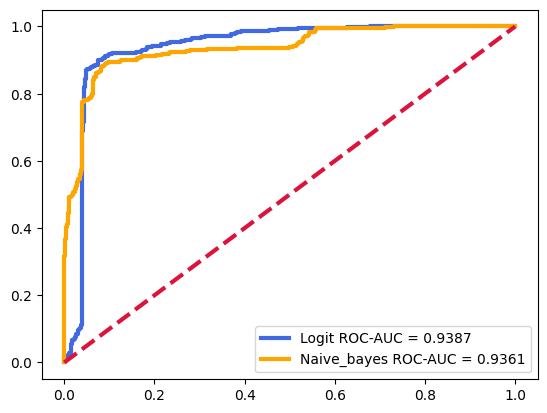

In [ ]:
from sklearn.naive_bayes import GaussianNB # импортируем функцию для построения модели байесовского классификатора
bayes = GaussianNB().fit(X_train, Y_train) # строим модель байесовского классифиатора
pred_bayes = bayes.predict_proba(X_test)[:, 1] # получаем прогнозы по построенной модели
fpr5, tpr5, thresholds5 = roc_curve(Y_test, pred_bayes)
bayes_auc = roc_auc_score(Y_test, pred_bayes)
plt.plot(fpr, tpr, label = 'Logit ROC-AUC = %.4f' %logit_auc, color = 'royalblue', linewidth=3)
plt.plot(fpr5, tpr5, label = 'Naive_bayes ROC-AUC = %0.4f' %bayes_auc, color = 'orange', linewidth=3)
plt.legend()
plt.plot([0, 1], [0, 1], color = 'crimson', linestyle = '--', linewidth = 3)
print('MSE Тривиальной модели:', np.mean((Y_test - Y_train.mean()) ** 2))
print('MSE Наивного байесовского классификатора:', np.mean((Y_test - pred_bayes) ** 2))

MSE Тривиальной модели: 0.24860799187128632
MSE Логистической регрессии: 0.5144572527719392
MSE Решающего дерева: 0.04126456166363162
MSE Случайного леса: 0.04979102364946647
MSE Градиентного бустинга: 0.0015149118553467935
MSE Метода ближайших соседей: 0.1707991855010661
MSE Наивного байесовского классификатора: 0.11366035781978955


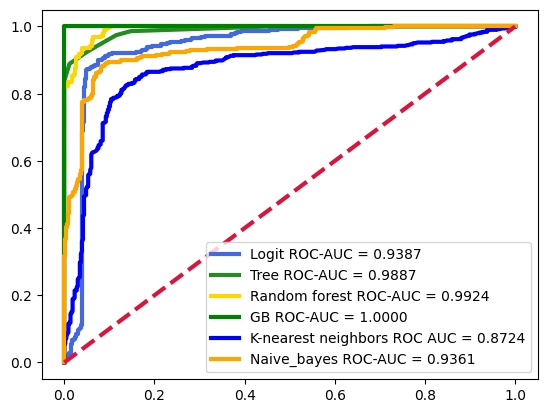

In [ ]:
# Строим общий график
plt.plot(fpr, tpr, label = 'Logit ROC-AUC = %.4f' %logit_auc, color = 'royalblue', linewidth=3)
plt.plot(fpr1, tpr1, label = 'Tree ROC-AUC = %.4f' %tree_auc, color = 'forestgreen', linewidth=3)
plt.plot(fpr2, tpr2, label = 'Random forest ROC-AUC = %.4f' %rf_auc, color = 'gold', linewidth=3)
plt.plot(fpr3, tpr3, label = 'GB ROC-AUC = %.4f' %gb_auc, color = 'green', linewidth=3)
plt.plot(fpr4, tpr4, label = 'K-nearest neighbors ROC AUC = %0.4f' %kn_auc, color = 'blue', linewidth=3)
plt.plot(fpr5, tpr5, label = 'Naive_bayes ROC-AUC = %0.4f' %bayes_auc, color = 'orange', linewidth=3)

plt.legend()
plt.plot([0, 1], [0, 1], color = 'crimson', linestyle = '--', linewidth = 3)
print('MSE Тривиальной модели:', np.mean((Y_test - Y_train.mean()) ** 2))
print('MSE Логистической регрессии:', np.mean((Y_test - logit_pred.reset_index(drop = True)) ** 2))
print('MSE Решающего дерева:', np.mean((Y_test - tree_pred) ** 2))
print('MSE Случайного леса:', np.mean((Y_test - rf_pred) ** 2))
print('MSE Градиентного бустинга:', np.mean((Y_test - gb_pred) ** 2))
print('MSE Метода ближайших соседей:', np.mean((Y_test - pred_knn) ** 2))
print('MSE Наивного байесовского классификатора:', np.mean((Y_test - pred_bayes) ** 2))